In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-eda/train.csv


# Importing the Dataset

In [2]:
df = pd.read_csv("/kaggle/input/black-friday-sales-eda/train.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


# Dataset Info

Basic Statistics of Dataset

In [3]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


Missing Values in the Data

In [4]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

Unique Values in Data

In [5]:
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529])

In [6]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [7]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [8]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [9]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [10]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [11]:
df['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

# Purchase Distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Purchase', ylabel='Density'>

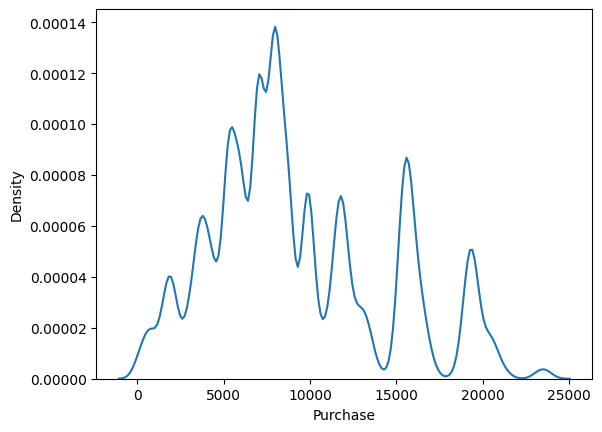

In [12]:
sns.kdeplot(df['Purchase'])

It seems that purchase quantity is higher between 5000 to 10000

# Data Cleaning

### Converting Categorical Data into Integer using Map Function 'Gender' column

In [13]:
title_mapping = {'F':0,'M':1}
df['Gender'] = df['Gender'].map(title_mapping)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,1,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,0,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,0,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,0,55+,1,C,2,0,20,NaN,NaN,365


### Outliers in Purchase Column

In [14]:
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers = df[(df['Purchase'] < Q1 - threshold * IQR) | (df['Purchase'] > Q3 + threshold * IQR)]
outliers

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
343,1000058,P00117642,1,26-35,2,B,3,0,10,16.0,NaN,23603
375,1000062,P00119342,0,36-45,3,A,1,0,10,13.0,NaN,23792
652,1000126,P00087042,1,18-25,9,B,1,0,10,14.0,16.0,23233
736,1000139,P00159542,0,26-35,20,C,2,0,10,15.0,16.0,23595
1041,1000175,P00052842,0,26-35,2,B,1,0,10,15.0,NaN,23341
...,...,...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,1,26-35,20,B,1,0,10,13.0,16.0,23753
544704,1005847,P00085342,0,18-25,4,B,2,0,10,13.0,NaN,23724
544743,1005852,P00202242,0,26-35,1,A,0,1,10,16.0,NaN,23529
545663,1006002,P00116142,1,51-55,0,C,1,1,10,13.0,16.0,23663


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'User_ID'),
  Text(1, 0, 'Gender'),
  Text(2, 0, 'Occupation'),
  Text(3, 0, 'Marital_Status'),
  Text(4, 0, 'Product_Category_1'),
  Text(5, 0, 'Product_Category_2'),
  Text(6, 0, 'Product_Category_3'),
  Text(7, 0, 'Purchase')])

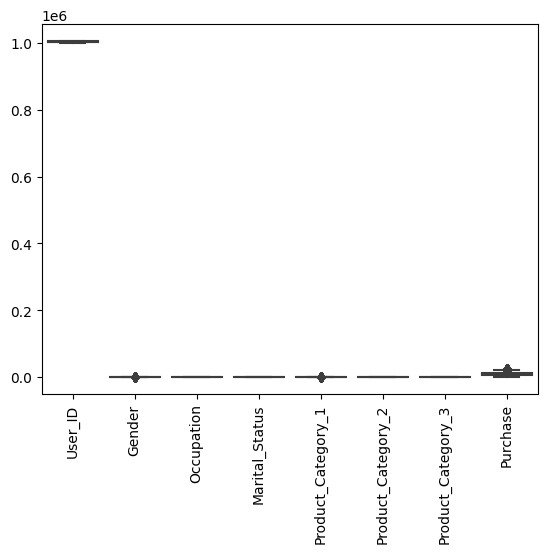

In [15]:
sns.boxplot(data = df)
plt.xticks(rotation='vertical')

It seems that purchase columns have recognisable outliers

# Dropping Unnecessary Columns

In [16]:
df.drop(['User_ID','Product_ID','Stay_In_Current_City_Years'], axis=1, inplace=True)

In [17]:
df.columns.str.lower()

Index(['gender', 'age', 'occupation', 'city_category', 'marital_status',
       'product_category_1', 'product_category_2', 'product_category_3',
       'purchase'],
      dtype='object')

# Filling N/A Values

In [18]:
a = df.loc[df['Product_Category_2'].notna(), ['Age', 'Product_Category_2']].groupby('Age').agg({'Product_Category_2': pd.Series.mode})
d = a.to_dict()['Product_Category_2']
d

{'0-17': 4.0,
 '18-25': 8.0,
 '26-35': 8.0,
 '36-45': 8.0,
 '46-50': 8.0,
 '51-55': 8.0,
 '55+': 8.0}

In [19]:
i='0-17'
for i in d:
    df.loc[ (df['Age']==i)&(df['Product_Category_2'].isna()), 'Product_Category_2']=d[i]

In [20]:
df['Product_Category_2']

0          4.0
1          6.0
2          4.0
3         14.0
4          8.0
          ... 
550063     8.0
550064     8.0
550065     8.0
550066     8.0
550067     8.0
Name: Product_Category_2, Length: 550068, dtype: float64

In [21]:
b = df.loc[df['Product_Category_3'].notna(),['Age','Product_Category_3']].groupby('Age').agg({'Product_Category_3':pd.Series.mode})
b

,Product_Category_3
Age,
0-17,16.0
18-25,16.0
26-35,16.0
36-45,16.0
46-50,16.0
51-55,16.0
55+,16.0


In [22]:
df['Product_Category_3'].fillna(16)

0         16.0
1         14.0
2         16.0
3         16.0
4         16.0
          ... 
550063    16.0
550064    16.0
550065    16.0
550066    16.0
550067    16.0
Name: Product_Category_3, Length: 550068, dtype: float64

Renaming Columns

In [23]:
df.rename(columns={'Gender': 'gender', 'Age': 'age','Occupation':'occupation','City_Category':'city_category','Marital_Status':'marital_status','Product_Category_1':'product_category_1','Product_Category_2':'product_category_2','Product_Category_3':'product_category_3','Purchase':'purchase'},inplace=True)

In [24]:
df

,gender,age,occupation,city_category,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,0,0-17,10,A,0,3,4.0,NaN,8370
1,0,0-17,10,A,0,1,6.0,14.0,15200
2,0,0-17,10,A,0,12,4.0,NaN,1422
3,0,0-17,10,A,0,12,14.0,NaN,1057
4,1,55+,16,C,0,8,8.0,NaN,7969
...,...,...,...,...,...,...,...,...,...
550063,1,51-55,13,B,1,20,8.0,NaN,368
550064,0,26-35,1,C,0,20,8.0,NaN,371
550065,0,26-35,15,B,1,20,8.0,NaN,137
550066,0,55+,1,C,0,20,8.0,NaN,365


In [25]:
df['purchase'].unique()

array([ 8370, 15200,  1422, ...,   135,   123,   613])

In [26]:
df.dtypes

gender                  int64
age                    object
occupation              int64
city_category          object
marital_status          int64
product_category_1      int64
product_category_2    float64
product_category_3    float64
purchase                int64
dtype: object

In [27]:
def ages(val):
    if '0-17'in val:
        val = val.replace('0-17','1')
        return val
    elif '18-25'in val:
        val = val.replace('18-25','2')
        return val
    elif '26-35'in val:
        val = val.replace('26-35','3')
        return val
    elif '36-45'in val:
        val = val.replace('36-45','4')
        return val
    elif '46-50'in val:
        val = val.replace('46-50','5')
        return val
    elif '51-55'in val:
        val = val.replace('51-55','6')
        return val
    elif '55+'in val:
        val = val.replace('55+','7')
        return val
df['age']=df['age'].apply(ages).astype('int')

In [28]:
df

,gender,age,occupation,city_category,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,0,1,10,A,0,3,4.0,NaN,8370
1,0,1,10,A,0,1,6.0,14.0,15200
2,0,1,10,A,0,12,4.0,NaN,1422
3,0,1,10,A,0,12,14.0,NaN,1057
4,1,7,16,C,0,8,8.0,NaN,7969
...,...,...,...,...,...,...,...,...,...
550063,1,6,13,B,1,20,8.0,NaN,368
550064,0,3,1,C,0,20,8.0,NaN,371
550065,0,3,15,B,1,20,8.0,NaN,137
550066,0,7,1,C,0,20,8.0,NaN,365


# Data Visualization

In [29]:
#Visualizing individual column
def stat(value):
    plt.subplot(2,2,1)
    sns.histplot(data=df,x=val,kde=True,bins=30)
    plt.title('Histogram of {}'.format(val))
    plt.subplot(2,2,2)
    sns.boxplot(data=df,x=val)
    plt.title('Boxplot of {}'.format(val))
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


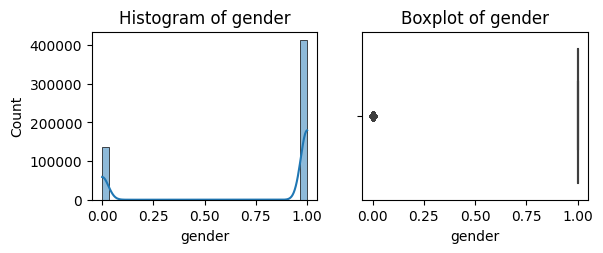

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


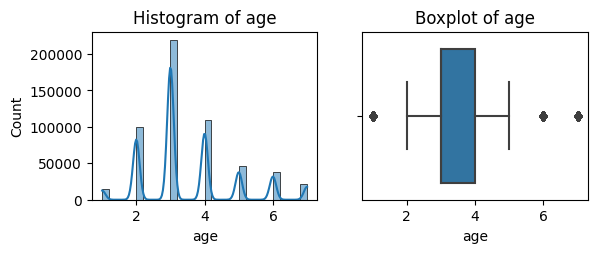

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


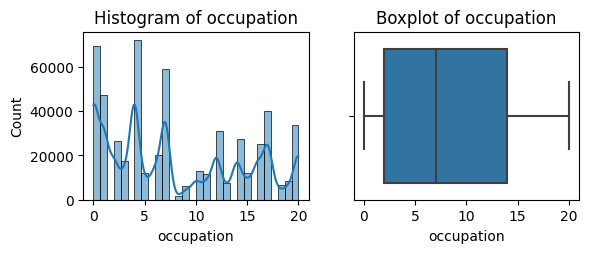

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


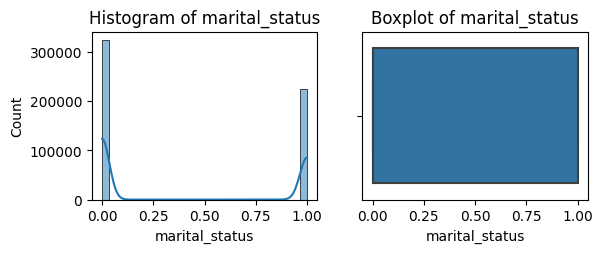

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


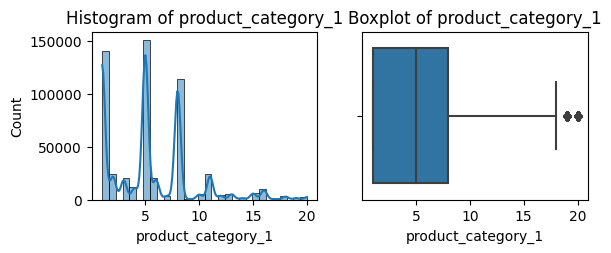

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


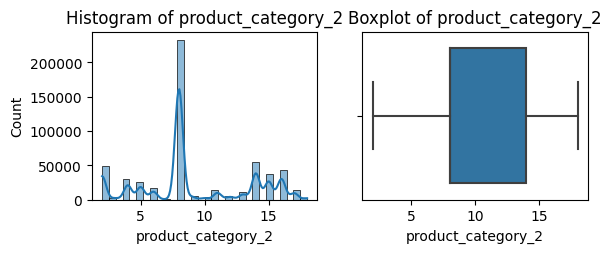

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


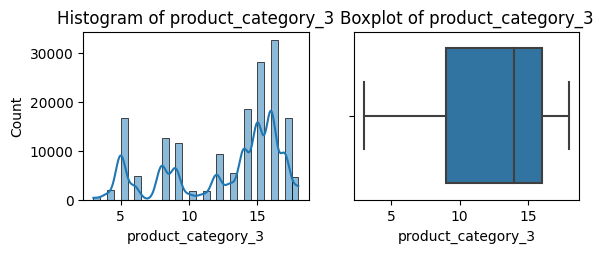

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


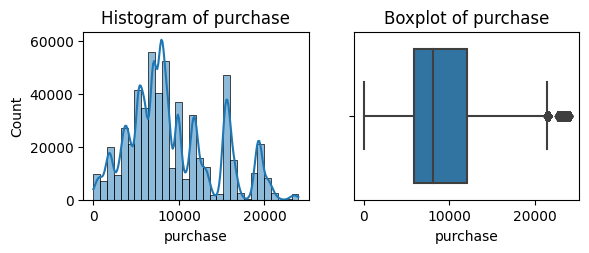

In [30]:
for val in df.select_dtypes(exclude=object):
    stat(val)

1. It seems that male purchase count is way more than female.
2. People between the age 18-45 has more purchase capacity than any others.
3. People who are not married, there purchase is more than people who are married.
4. Prodect number 1, 5 and 8 are purchased more in prodect category 1.
5. Product number 7 is purchased more in product categoy 2.
6. Product number 5 and 13-19 are purchased more in product category 3.

Text(0.5, 1.0, 'Age Vs Purchase')

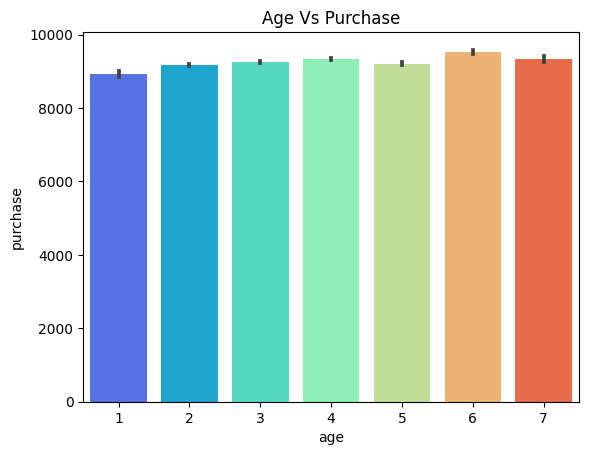

In [31]:
#Age vs Purchase
sns.barplot(x='age', y='purchase', data=df, palette='rainbow')
plt.title('Age Vs Purchase')

It seems that people of all ages purchase amount lies between 8000-10000.

Text(0.5, 1.0, 'Occupation Vs Purchase')

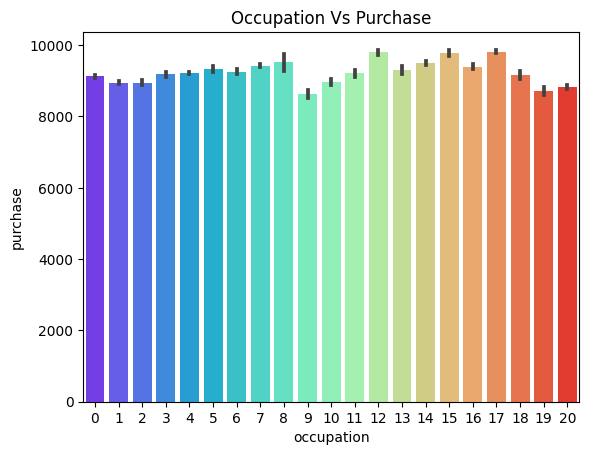

In [32]:
#Occupation vs Purchase
sns.barplot(x='occupation', y='purchase', data=df, palette='rainbow')
plt.title('Occupation Vs Purchase')

Text(0.5, 1.0, 'Product Category 1 Vs Purchase')

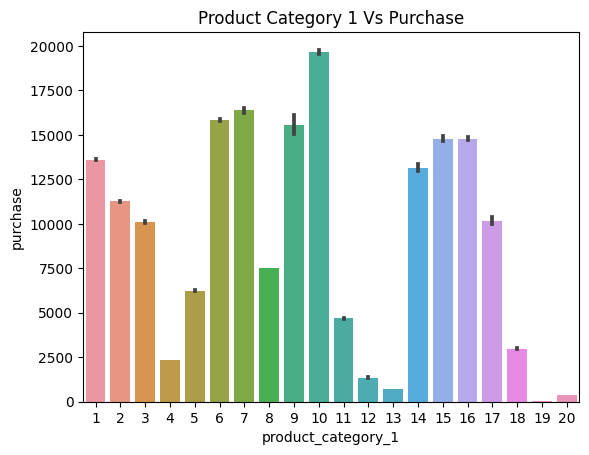

In [33]:
#Product Category 1 vs Purchase
sns.barplot(x='product_category_1', y='purchase', data=df)
plt.title('Product Category 1 Vs Purchase')

Text(0.5, 1.0, 'Product Category 2 Vs Purchase')

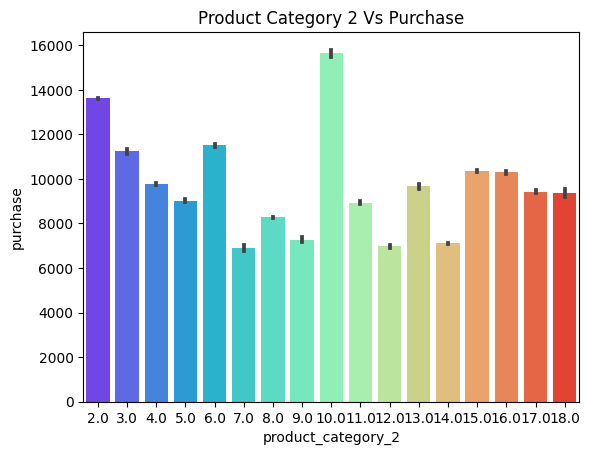

In [34]:
#Product Category 2 vs Purchase
sns.barplot(x='product_category_2',y='purchase',data=df,palette='rainbow')
plt.title('Product Category 2 Vs Purchase')

Text(0.5, 1.0, 'Product Category 3 Vs Purchase')

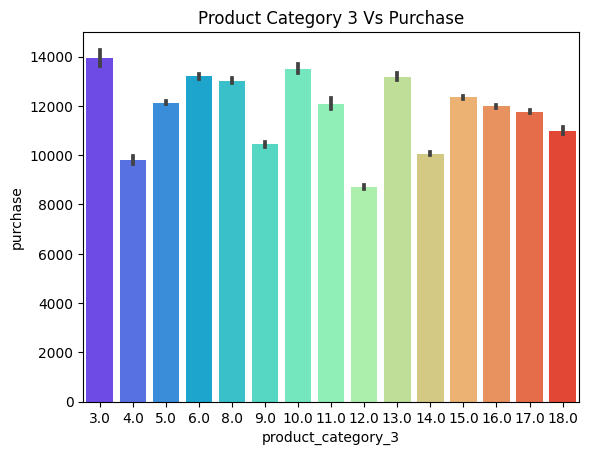

In [35]:
#product category 3 vs Purchase
sns.barplot(data=df,x='product_category_3',y='purchase',palette='rainbow')
plt.title('Product Category 3 Vs Purchase')

Text(0.5, 1.0, 'Marital Status Vs Purchase')

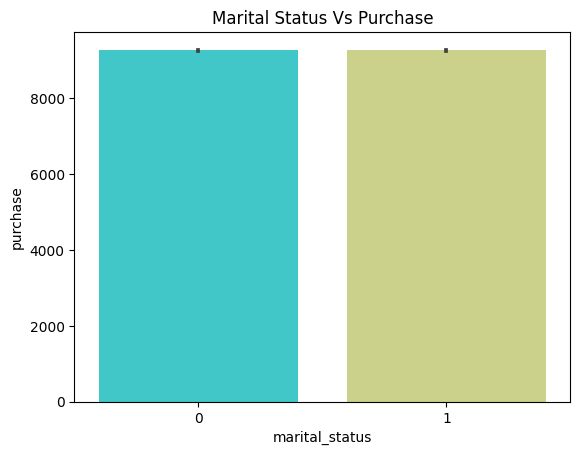

In [36]:
#Marital Status vs Purchase
sns.barplot(data=df,x='marital_status',y='purchase',palette='rainbow')
plt.title('Marital Status Vs Purchase')

0 for No and 1 for Yes

Text(0.5, 1.0, 'Gender Vs Purchase')

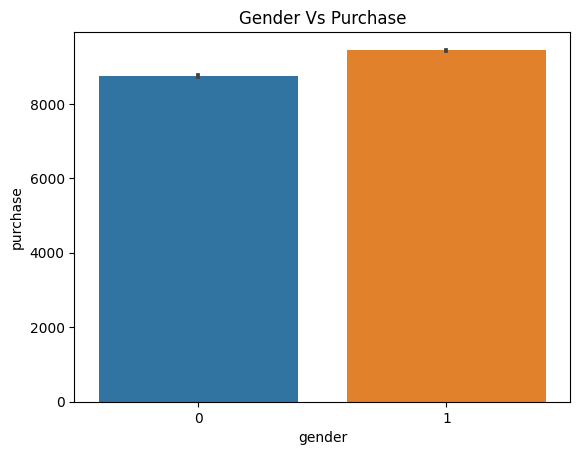

In [37]:
#Gender vs Purchase
sns.barplot(data=df,x='gender',y='purchase')
plt.title('Gender Vs Purchase')

0 for female and 1 for male

([<matplotlib.patches.Wedge at 0x7a5c0d7c77c0>,
 [Text(0.27267989579948126, 1.0656667745720443, 'B'),
  Text(-0.9774040218269879, -0.5046596656326213, 'C'),
  Text(0.7311976184733743, -0.8217968378734892, 'A')],
 [Text(0.14873448861789884, 0.5812727861302059, '42%'),
  Text(-0.5331294664510843, -0.27526890852688435, '31%'),
  Text(0.3988350646218405, -0.4482528206582668, '27%')])

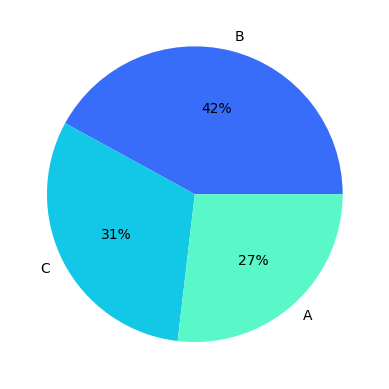

In [38]:
#City category pie chart
temp = df['city_category'].value_counts().values
color = sns.color_palette('rainbow')[0:7]
plt.pie(temp, labels=['B','C','A'],colors=color,autopct='%.0f%%')

It seems that city B has more customers than city A and city C.

Conclusion:-
1. Launching the products which are male friendly are more likely to get sell.
2. Launching products for adults will get more attention.
3. Launching products for unmarried people will sale quickly and profitably.
4. Focusing on city B more than the city A and C will be more profitable.